#Predictor de canciones de Spotify
##Hecho por:

*   Sofia Cano
*   Jefferson Hernández
*   Juan Felipe Ayala





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, DistanceMetric
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import matthews_corrcoef, accuracy_score, f1_score

#Carga del dataset (Ver README)

In [2]:
df = pd.read_csv(r"data.csv",sep=',')

df = df.drop(df.columns[0], axis=1)
df = df.drop(columns=['song_title', 'artist'])
y = df['target'].values
df = df.drop(columns=['target'])
X = df.values

#Pre-procesamiento de los datos

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Implementación KNN

##Selección del mejor número de vecinos (k)

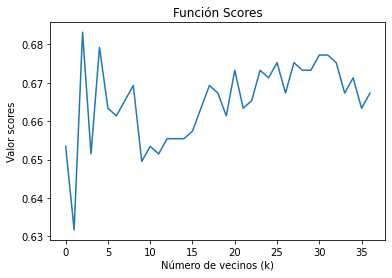

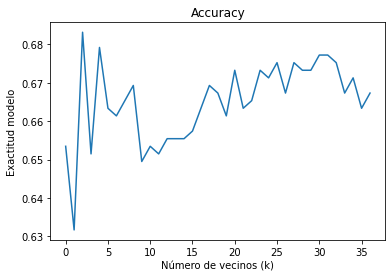

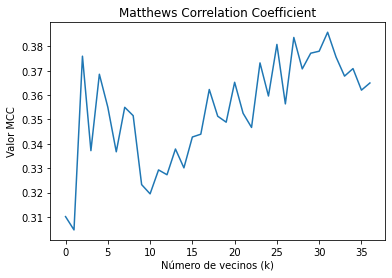

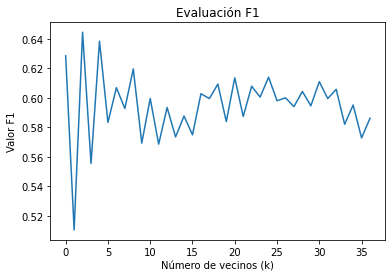

Mejor número de vecinos según Scores: 3 con valor: 0.6831683168316832
Mejor número de vecinos según Accuracy: 3 con valor: 0.6831683168316832
Mejor número de vecinos según MCC: 32 con valor: 0.38579394462448086
Mejor número de vecinos según F1: 3 con valor: 0.6444444444444445


In [8]:
k_range = range(1, int(np.sqrt(len(y_train))))

#Distancias: euclidean. manhattan. chebyshev. minkowski. seuclidean. mahalanobis. hamming
distance='euclidean'

scores = []
acc = []
MCC = []
F1 = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k, weights='uniform', metric=distance, metric_params=None, algorithm='brute')
  knn.fit(X_train, y_train)
  scores.append(knn.score(X_test, y_test))
  y_test_predict = knn.predict(X_test)
  acc.append(accuracy_score(y_test, y_test_predict))
  MCC.append(matthews_corrcoef(y_test, y_test_predict))
  F1.append(f1_score(y_test,y_test_predict))

plt.plot(scores)
plt.title("Función Scores")
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Valor scores")
plt.show()
plt.plot(acc)
plt.title("Accuracy")
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Exactitud modelo")
plt.show()
plt.plot(MCC)
plt.title("Matthews Correlation Coefficient")
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Valor MCC")
plt.show()
plt.plot(F1)
plt.title("Evaluación F1")
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Valor F1")
plt.show()

print("Mejor número de vecinos según Scores:",k_range[np.argmax(scores)],"con valor:",scores[np.argmax(scores)])
print("Mejor número de vecinos según Accuracy:",k_range[np.argmax(acc)],"con valor:",acc[np.argmax(acc)])
print("Mejor número de vecinos según MCC:",k_range[np.argmax(MCC)],"con valor:",MCC[np.argmax(MCC)])
print("Mejor número de vecinos según F1:",k_range[np.argmax(F1)],"con valor:",F1[np.argmax(F1)])

##Implementación algoritmo.
Se usan 32 vecinos ya que se obtiene el mejor resultado según MCC

In [ ]:
n_neighbors = 32

knn = KNeighborsClassifier(n_neighbors, weights='uniform', metric=distance, metric_params=None, algorithm='auto')
knn = knn.fit(X_train, y_train)

y_predict=knn.predict(X_train)
print('Conjunto Train')
print('Accuracy of K-NN classifier on training set: {:.5f}'
     .format(accuracy_score(y_train, y_predict)))
print('MCC of K-NN classifier on training set: {:.5f}'
     .format(matthews_corrcoef(y_train, y_predict)))

t0 = timeit.default_timer()
y_predict_knn=knn.predict(X_test)
time = timeit.default_timer() - t0
print('\nConjunto Test')
print('Accuracy of K-NN classifier on test set: {:.5f}'
     .format(accuracy_score(y_test, y_predict_knn)))
print('MCC of K-NN classifier on test set: {:.5f}'
     .format(matthews_corrcoef(y_test, y_predict_knn)))
print('Tiempo de clasificación: {:.5f}'.format(time),'s')

Conjunto Train
Accuracy of K-NN classifier on training set: 0.72288
MCC of K-NN classifier on training set: 0.47598

Conjunto Test
Accuracy of K-NN classifier on test set: 0.67723
MCC of K-NN classifier on test set: 0.38579
Tiempo de clasificación: 0.04422 s


#Implementación clasificador Logistic Regression

In [ ]:
#Solvers: 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'

log_reg = LogisticRegression(C=0.1, random_state=1, solver='lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)

y_predict=log_reg.predict(X_train)
print('Conjunto Train')
print('Accuracy of LR classifier on training set: {:.5f}'
     .format(accuracy_score(y_train, y_predict)))
print('MCC of LR classifier on training set: {:.5f}'
     .format(matthews_corrcoef(y_train, y_predict)))

t0 = timeit.default_timer()
y_predict_LR=log_reg.predict(X_test)
time = timeit.default_timer() - t0
print('\nConjunto Test')
print('Accuracy of LR classifier on test set: {:.5f}'
     .format(accuracy_score(y_test, y_predict_LR)))
print('MCC of LR classifier on test set: {:.5f}'
     .format(matthews_corrcoef(y_test, y_predict_LR)))
print('Tiempo de clasificación: {:.5f}'.format(time),'s')

Conjunto Train
Accuracy of LR classifier on training set: 0.67593
MCC of LR classifier on training set: 0.35209

Conjunto Test
Accuracy of LR classifier on test set: 0.65941
MCC of LR classifier on test set: 0.31938
Tiempo de clasificación: 0.00031 s


#Implementación Kernel-SVM

In [ ]:
kernels=['linear', 'poly', 'rbf', 'sigmoid']
# lineal
# Kernel=0
# msv = svm.SVC(kernel=kernels[Kernel])

# polinomial cuadrático
# Kernel=1
# msv = svm.SVC(kernel=kernels[Kernel],degree=2)

# polinomial cúbico
# Kernel=1
# msv = svm.SVC(kernel=kernels[Kernel],degree=3)

# rbf 
Kernel=2
msv = svm.SVC(kernel=kernels[Kernel])

msv.fit(X_train, y_train)

y_predict=msv.predict(X_train)
print('Conjunto Train')
print('Accuracy of SVM classifier on training set: {:.5f}'
     .format(accuracy_score(y_train, y_predict)))
print('MCC of SVM classifier on training set: {:.5f}'
     .format(matthews_corrcoef(y_train, y_predict)))

t0 = timeit.default_timer()
y_predict_SVM=msv.predict(X_test)
time = timeit.default_timer() - t0
print('\nConjunto Test')
print('Accuracy of SVM classifier on test set: {:.5f}'
     .format(accuracy_score(y_test, y_predict_SVM)))
print('MCC of SVM classifier on test set: {:.5f}'
     .format(matthews_corrcoef(y_test, y_predict_SVM)))
print('Tiempo de clasificación: {:.5f}'.format(time),'s')

Conjunto Train
Accuracy of SVM classifier on training set: 0.80952
MCC of SVM classifier on training set: 0.62405

Conjunto Test
Accuracy of SVM classifier on test set: 0.73663
MCC of SVM classifier on test set: 0.47700
Tiempo de clasificación: 0.01931 s


#Implementación Red Neuronal

In [ ]:
verbose=False

clf = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=1, max_iter=2000, verbose=verbose)

clf.fit(X_train, y_train)

y_predict=clf.predict(X_train)
print('Conjunto Train')
print('Accuracy of ANN classifier on training set: {:.5f}'
     .format(accuracy_score(y_train, y_predict)))
print('MCC of ANN classifier on training set: {:.5f}'
     .format(matthews_corrcoef(y_train, y_predict)))

t0 = timeit.default_timer()
y_predict_ANN=clf.predict(X_test)
time = timeit.default_timer() - t0
print('\nConjunto Test')
print('Accuracy of ANN classifier on test set: {:.5f}'
     .format(accuracy_score(y_test, y_predict_ANN)))
print('MCC of ANN classifier on test set: {:.5f}'
     .format(matthews_corrcoef(y_test, y_predict_ANN)))
print('Tiempo de clasificación: {:.5f}'.format(time), 's')

Conjunto Train
Accuracy of ANN classifier on training set: 0.99868
MCC of ANN classifier on training set: 0.99736

Conjunto Test
Accuracy of ANN classifier on test set: 0.73861
MCC of ANN classifier on test set: 0.47730
Tiempo de clasificación: 0.00184 s
